# DBSCAN

In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Import .csv file and convert it to the dataframe object

airlines = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
airlines = airlines.rename(columns = {'ID#':'ID', 'Award?':'Award'})
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [10]:
airlines1 =  airlines.drop(['ID','Award'], axis=1)
airlines1.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [11]:
array = airlines1.values
array

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]], dtype=int64)

In [12]:
stdscr = StandardScaler().fit(array)
x = stdscr.transform(array)

In [13]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [14]:
dbscan = DBSCAN(eps = 2, min_samples = 11)
dbscan.fit(x)

DBSCAN(eps=2, min_samples=11)

In [15]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
cl = pd.DataFrame(dbscan.labels_, columns = ['Cluster'])
cl

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [17]:
pd.concat([airlines1, cl], axis = 1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [18]:
cl.value_counts()

Cluster
 0         3772
-1          192
 1           23
 2           12
dtype: int64

In [19]:
# From above output we can conclude that data contains 192 outliers and most of the data points belong to cluster 0

# KMeans Clustering

In [3]:
# Build cluster algorithm

from sklearn.cluster import KMeans

In [4]:
# Standardization
# This will be used for k means

from sklearn.preprocessing import StandardScaler

In [11]:
std_df = StandardScaler().fit_transform(airlines1)     
std_df.shape

(3999, 10)

In [12]:
# How to find optimum number of  cluster
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

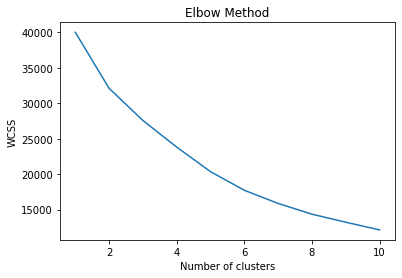

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Build Cluster Algorithm

from sklearn.cluster import KMeans
clusters_new = KMeans(6, random_state=42)
clusters_new.fit(std_df)

KMeans(n_clusters=6, random_state=42)

In [15]:
clusters_new.labels_

array([0, 0, 0, ..., 4, 0, 0])

In [16]:
# Assign clusters to the data set

airlines1['clusterid_new'] = clusters_new.labels_

In [62]:
# These are standardized values

clusters_new.cluster_centers_

array([[-7.88733592e-02, -8.09517626e-02,  8.61824720e-02,
        -9.82418871e-02, -5.79248771e-02, -9.35352009e-02,
         3.69296767e-02, -1.54256977e-01, -1.68033016e-01,
         4.57978686e-01, -8.85217880e-01],
       [-3.94035722e-01, -7.28310318e-03, -6.95023062e-01,
        -9.82418871e-02, -6.27665798e-02, -5.63606461e-01,
        -6.08233128e-01, -1.90789462e-01, -2.08192700e-01,
        -9.63362041e-01,  1.05650261e+00],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
         6.17851143e-01,  8.75493989e-02,  2.20346809e-01,
        -7.24639805e-02,  7.11588146e-01],
       [ 8.96689130e-01,  8.87499521e-01,  2.32681920e-02,
        -9.82418871e-02, -6.27665798e-02,  5.09378375e-01,
         1.60939978e+00,  3.77310773e+00,  4.02728966e+00,
         1.74315821e-01, -3.22087445e-01],
       [ 1.35696871e+00,  1.57732224e-01,  1.81747096e+00,
        -9.82418871e-02, -4.98635031e-02,  2.03290404e+00,
  

In [17]:
airlines1.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,41038.760518,108.231623,1.050393,1.000000,1.000462,3249.301896,5.253814,221.007397,0.666204,3632.014794
1,1,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667
2,2,208330.192500,255.690000,4.565000,1.000000,1.002500,66196.032500,21.497500,568.050000,1.752500,5389.770000
3,3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233
4,4,74838.745337,96.619627,3.033252,1.000000,1.000811,23395.002433,17.330089,226.420114,0.677210,4504.137064
5,5,171889.696552,818.062069,2.048276,1.000000,1.000000,28751.503448,26.827586,5673.620690,16.531034,4584.068966


In [18]:
airlines1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,2
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,4
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [19]:
cl = pd.DataFrame(clusters_new.labels_, columns = ['Cluster'])
cl

,Cluster
0,0
1,0
2,0
3,0
4,2
...,...
3994,0
3995,0
3996,4
3997,0


In [20]:
cl.value_counts()

Cluster
0          2163
4          1233
2           400
5           145
3            43
1            15
dtype: int64

In [21]:
# Most of the data points belong to cluster 0 and 4

# Hierarchical Clustering

In [22]:
# Import hierarchical clustering libraries

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [23]:
# Normalization function

def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return (x)

In [24]:
df_norm = norm_func(airlines1.iloc[:,0:])

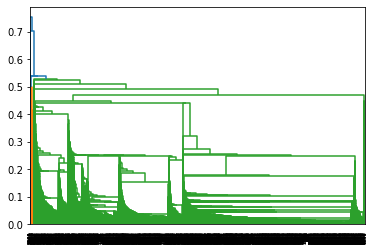

In [25]:
# Create Dendrogram

dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'single'))

In [26]:
# Create clusters

hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'single')

In [27]:
# Save clusters for chart

y_hc = hc.fit_predict(df_norm)
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])

In [28]:
df_norm['h_clusterid'] = hc.labels_

In [29]:
hc.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
cl = pd.DataFrame(hc.labels_, columns = ['Clusters'])
cl

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [31]:
cl.value_counts()

Clusters
0           3953
1             42
2              1
3              1
4              1
5              1
dtype: int64

In [32]:
# Hierarchical clustering gave total cluster number=6, but when compared with kmean, the hierarchical clustering contains approx 99% data in single cluster only.
# So heirarchical clustering will not useful to analyze different customer. 
# KMeans Clustering is preffered.